# Clustering Data 

## Supervised vs. Unsupervised Learning


Some of the methods we covered so far can be used in prediction through learning/fitting a model using the  **training** data. These are also called **supervised** methods as the training data contains categorical or numerical response to be learned by the model. 

In general, we can say that for each observation  $x_i$, where $i = 1, . . . , n$ there is an associated response $y_i$. 
The model is fit such that it relates the response to the independent variables, 
so that it can accurately predict the response for future observations. 
Linear regression or logistic regression are examples of such models. 



On the other hand, we may have data that does not come with any labels or response variables, or we may want to find **natural groupings** in the data as part of our exploratory data analysis. 

This is where we apply the concept of **cluster analysis** or clustering. We want to find out if observations form clusters so that each cluster contains a subset of the data that share common characteristics. We can define a distance metric or a similarity measure to decide how "close" two observations are and place them in the same cluster. 


This situation is referred to as **unsupervised** because we do not have a response variable from which a model is learned. 

---




For example, 
in a market segmentation study we can try to cluster the customers on the basis of the variables measured, 
in order to identify distinct groups of potential customers. 
Identifying such groups can be of interest because it might be that the groups differ with 
respect to some property of interest, such as spending habits.

The image below shows a clustering data set involving three groups. 
Each group is shown using a different colored symbol. 
The left image shows three groups that are well-separated. 
In this kind of setting, a clustering approach should successfully identify the three groups. 
In the right image, there is some overlap among the groups, wherein the clustering task is more challenging. 

Note that the colors and shapes are there only for the demonstration; in reality, we do **not** have the knowledge of which observation belongs to which group in the unsupervised setting. 

<img src="../images/cluster1.JPG">



One cannot expect a clustering method to assign all of the overlapping points to their correct group. 


In the example shown above, there are only two variables, so one could simply visually inspect the scatterplots of the observations in order to identify clusters. 
But in reality, data is high-dimensional, having many more than two variables. 
In those cases, it is not easy to understand the clusters in the high-dimensional space; we need algorithms that will cluster the data. 

**Note:**
When performing clustering on data such as shown on the right, there is no _correct answer_.
There are only some answers that are better or worse than others.

---

## K-Means Clustering

K-Means clustering is one of the simple and fast clustering algorithms. Here, the aim is to partition the data into a pre-specified number of **K** distinct, non-overlapping clusters. Once the desired number of clusters K is specified, 
K-means algorithm will assign each observation to exactly one of the K clusters. 
The observations satisfy the following two conditions:

    i) Each observation belongs to at least one of the K clusters.
    ii) The clusters are non-overlapping. No observation belongs to more than one cluster

For instance, if the $i$th observation is in the $k$th cluster, then $i \in C_k$ (Note: $\in$ means "is an element of"). 


The idea behind K-means clustering is that a good clustering is one for which 

 - the within-cluster variation is as small as possible (high intra-class similarity or low intra-class distance) 
 - the between-cluster variation is as high as possible (low inter-class similarity or high inter-class distance) 
 
 
 <img src=../images/distance.png>
 
The within-cluster variation for cluster $C_k$ is a measure W($C_k$) of the amount 
by which the observations within a cluster differ from each other. 
Hence, we want to solve the problem in the below equation:

$$\underset{C1,...,CK}{\mathrm{minimize}} \bigg\{\sum_{k=1}^{K} W(C_k) \bigg\}  $$

Simply, it says that we want to partition the observations into $K$ clusters 
such that the total within-cluster variation, summed over all _K_ clusters, is as small as possible. 
In order to make it actionable, we need to define the within-cluster variation. 
There are many possible ways to define this concept, 
but by far the most common choice involves **squared Euclidean distance**.
That is, we define


$$W(C_k) = \frac{1}{|{C_k}|} \sum_{i,\ {i'} \in C_k} \sum_{j=1}^P({x_{ij}}-{x_{i'j}})^2 $$


where |$C_k$| denotes the number of observations in the $k$th cluster. 
In other words, the within-cluster variation for the $k$th cluster is the sum of all of the 
pairwise squared Euclidean distances between the observations in the kth cluster, 
divided by the total number of observations in the kth cluster. 

Combining these two equations gives the optimization problem that defines K-means clustering,

$$\underset{C1,...,CK}{\mathrm{minimize}} \bigg\{\sum_{k=1}^{K} \frac{1}{|{C_k}|} \sum_{i,\ {i'} \in C_k} \sum_{j=1}^P({x_{ij}}-{x_{i'j}})^2\bigg\}  $$

We need an algorithm to solve the above equation that is, 
a method to partition the observations into K clusters such that the objective is minimized.


It could be a very difficult problem to solve, 
since there are almost $K^n$ ways to partition $n$ observations into $K$ clusters. 
This is a huge number unless $K$ and $n$ are tiny. 
Fortunately, a very simple algorithm exists to provide a local optimum to 
the K-means optimization problem, which is laid out below.

-----
<span style="color:#1576b2; font-size:16px; font-weight:700"> Algorithm : K-Means Clustering</span>

-------
1. Randomly assign a number, from 1 to K, to each of the observations. These serve as initial cluster assignments for the observations.

2. Iterate until the cluster assignments stop changing:
    
    a. For each of the K clusters, compute the **cluster centroid**. The $k$th cluster centroid is the vector of the p feature **means** for the observations in the kth cluster.  
    b. Assign each observation to the cluster whose centroid is closest (where closest is defined using Euclidean distance).
----

In Step 2(a), the **cluster means** for each feature are the constants that minimize the sum-of-squared deviations. 
In Step 2(b) observations are reallocated. 
This means that as the algorithm is run, 
the clustering obtained will continually improve until the result no longer changes. 
The objective of (3) will never increase. 
When the result no longer changes, a local optimum has been reached. 


K-means clustering derives its name from the fact that in Step 2 (a), 
the **cluster centroids are computed as the mean of the observations assigned to each cluster**. 


**NOTE:** Because the K-means algorithm finds a **local** rather than a global optimum,
the results obtained **will depend on the initial (random) cluster assignment** of each observation in Step 1 of Algorithm 1. 
For this reason, it is **important to run the algorithm multiple times from different random initial configurations**. Then one selects the best solution, for which the objective is smallest.

---


The figure below shows the progression of the algorithm on a simple example:

<img src="../images/kmeans.JPG">

The top left image shows initial observations. 
Top center image shows step 1 of the algorithm where each observation is randomly assigned to a cluster. 
The top right image shows step 2(a) of an iteration where cluster centroids are computed. 
Centroids are shown as large colored disks. 
In beginning centroids are almost overlapping because the initial cluster assignments were chosen at random. 
The bottom left image shows is step 2(b) of the iteration, each observation is assigned to the nearest centroid. 
The bottom center image shows step 2(a) of next iteration, leading to new cluster centroids. 
The bottom right image shows the results obtained after ten iterations.

----

**EXAMPLE:** 

The `kmeans()` function performs K-means clustering in R. 
We begin with a simple simulated set of observations where there are two clusters in the data. 
The first 25 observations have a mean shift relative to the next 25 observations.

In [1]:
# Set the seed to reproduce the results
set.seed(4)

# Generate a random normal distribution of 100 values. Generate a matrix out of this normal distribution.
x = matrix(rnorm(50 * 2), ncol = 2)

# Add 3 to rows 1 to 25 in first column of the matrix
x[1:25, 1] = x[1:25, 1] + 3

# Subtract 4 from rows 1 to 25 in second column of the matrix
x[1:25, 2] = x[1:25, 2] - 4

In [2]:
df <- data.frame(x)
df

X1,X2
<dbl>,<dbl>
3.21675486,-4.66374314
2.45750743,-4.62372649
3.89114465,-4.07963243
3.59598058,-3.56437524
4.63561800,-2.02909903
3.68927544,-4.59675867
1.71875337,-4.55250721
2.78685548,-3.30403337
4.89653987,-4.15566396


We will perform K-means clustering with $K = 2$. 
nstart=20 implies multiple initial cluster assignments.

In [3]:
km.fit = kmeans(df, centers = 2, nstart = 20)

# The centers argument: either the number of clusters (e.g., k) or a set of initial (distinct) cluster 
# centers. If a number, a random set of (distinct) rows in x is chosen as the initial centers.

# The nstart argument: if centers (see above) is a number, nstart tells the number of random sets to be chosen.

# To run the kmeans() function in R with multiple initial cluster assignments, we use the nstart argument. 
# If a value of nstart greater than one is used, then K-means clustering will be performed using multiple 
# random assignments (as described in Step 1 of the algorithm above), and the kmeans() function will report 
# only the best results.

The cluster assignments of the 50 observations are contained in km.fit$cluster...

In [4]:
km.fit$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

The K-means clustering perfectly separated the observations into two clusters 
even though we did not supply any group information to `kmeans()`. 
We can plot the data, with each observation colored according to its cluster assignment.

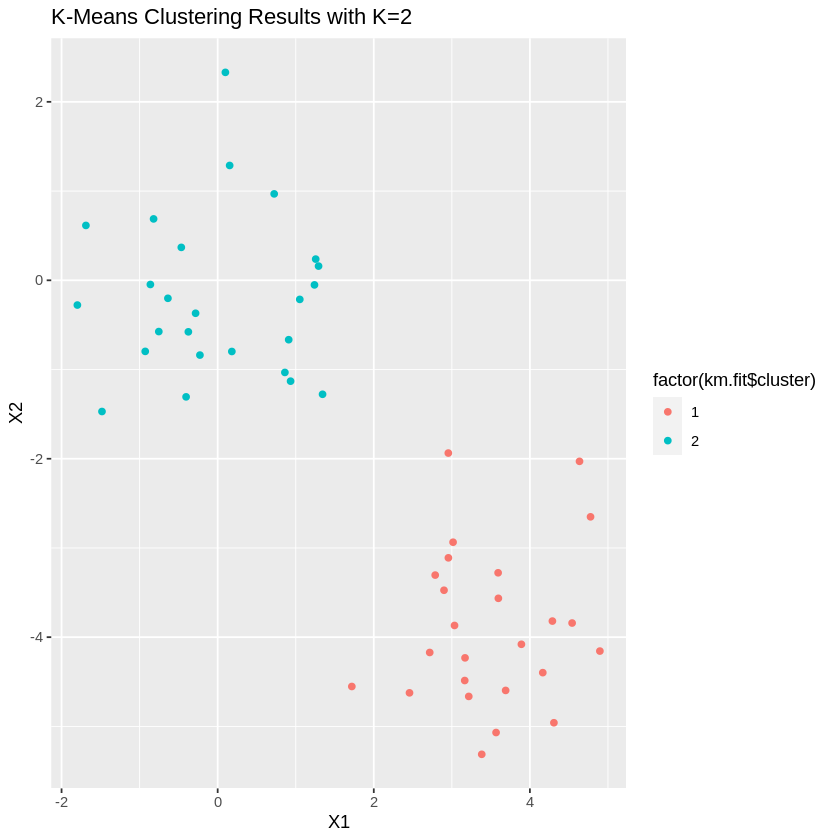

In [5]:
library(ggplot2)

ggplot(df) + geom_point(aes(x=X1, y=X2, color=factor(km.fit$cluster)))+
ggtitle("K-Means Clustering Results with K=2")
     

Now, let's apply K-means clustering algorithm on $x$ and divide it into 3 clusters... 

In [6]:
set.seed (4)
km.fit = kmeans(df, 3, nstart = 20)

# Clustering results
km.fit

K-means clustering with 3 clusters of sizes 14, 11, 25

Cluster means:
          X1          X2
1 -0.7532448 -0.39907658
2  0.8968634  0.05541174
3  3.4968274 -3.88442866

Clustering vector:
 [1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 2 2 1 2 2 2 1 1 2 1 1 2
[39] 1 1 2 1 2 1 1 1 2 1 2 1

Within cluster sum of squares by cluster:
[1]  9.796515 14.391060 33.865779
 (between_SS / total_SS =  85.5 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

We can plot the data, with each observation colored according to its cluster assignment.

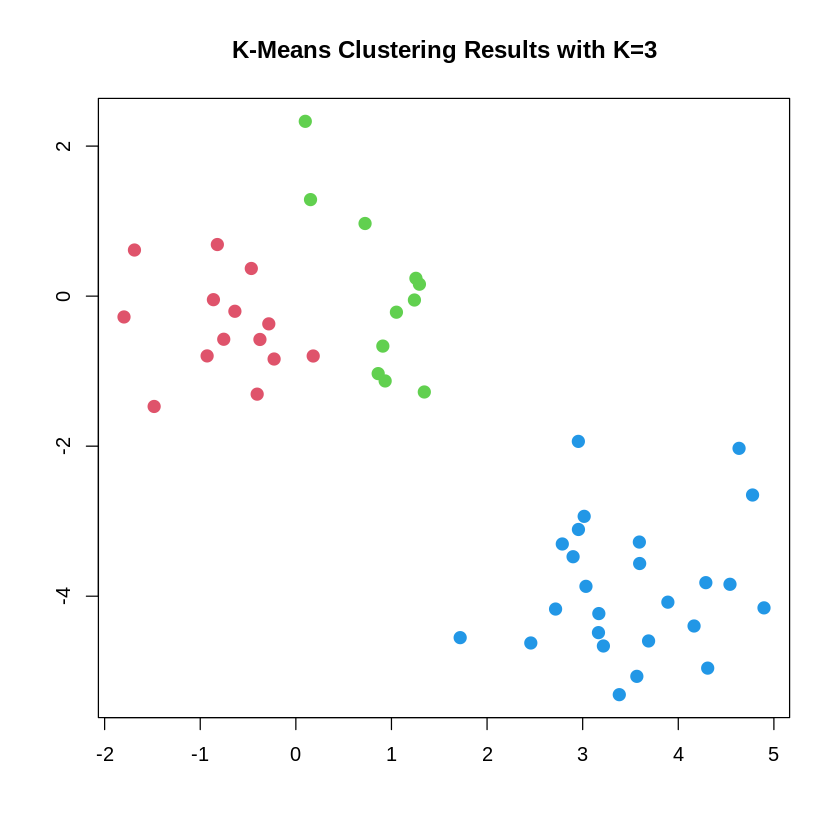

In [7]:
plot(x, col=(km.fit$cluster+1), main="K-Means Clustering Results with K=3", xlab ="", ylab="", pch =20, cex =2)

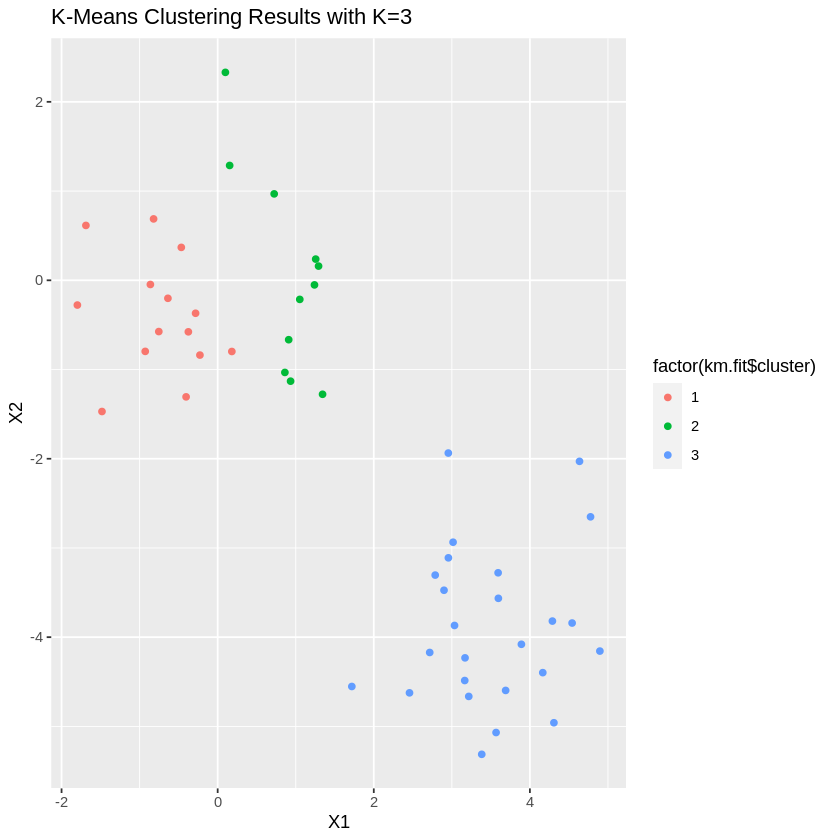

In [8]:
ggplot(df) + geom_point(aes(x=X1, y=X2, color=factor(km.fit$cluster)))+
ggtitle("K-Means Clustering Results with K=3")
     

##### `kmeans()` with multiple initial cluster assignments explained:

Here we compare using nstart=1 to nstart=20

In [9]:
set.seed(3)
km.fit = kmeans(x,3,nstart = 1)
km.fit$tot.withinss

[1] 63.06196

In [10]:
set.seed(3)
km.fit = kmeans(x,3,nstart = 20)
km.fit$tot.withinss

[1] 58.05335

So, `km.fit$tot.withinss` is the total within-cluster sum of squares, 
which we seek to minimize by performing K-means clustering. 
The individual within-cluster sum-of-squares are contained in the vector `km.fit$withinss`. 
It is strongly recommended to always run K-means clustering with a large value of nstart, 
such as 20 or 50, since otherwise an undesirable local optimum may be obtained. 
In addition to using multiple initial cluster assignments, 
it is also **important to set a random seed using the `set.seed()` function**. 
This way, the **initial cluster assignments in Step 1 can be replicated**, and the K-means output will be fully reproducible.

---

### Disadvantages of the K-Means Algorithm

As we have to provide the number of clusters, K-Means algorithm will always that many clusters whether the data naturally divides into those clusters or not. There are methods we can use to guess the number of clusters and supply it to the K-Means algorithm. Another disadvantage is that it is sensitive to the outliers in the data. Since it computes the cluster centroid as the **means of the features**, these centroids will shift towards the outliers because outliers will have leverage over the means. 

We can compute the **median** as opposed to the mean to provide a more robust approach. The resulting **K-medoids** algorithm will always use one of the observations (the median) as the cluster centroid. 

---

## PAM Clustering

The **Partitioning Around Medoids (PAM)** clustering algorithm is less sensititive to the outliers in the data and provides a robust alternative to the K-Means algorithm. For a large data set, PAM will require a longer computing time and larger memory allocation. **CLARA (Clustering Large Applications)** is an extension to k-medoids (PAM) to deal with data containing a large number of objects (more than several thousand observations) in order to reduce computing time and RAM storage problem.

The `fpc` library has an implementation of PAM named `pamk` that does not require a pre-specified **K**, it computes an optimal K given the data set, and also switches to clara for a large data set. 


To call the `pamk` function, we specify how many **K** values to consider (here 1,2,3,4,5) and we want the criteria printed out. 

In [11]:
library(fpc)
pclust <- pamk(df, krange=1:5, critout=TRUE)

pclust

1  clusters  0 
2  clusters  0.6884167 
3  clusters  0.5147445 
4  clusters  0.3485573 
5  clusters  0.3598256 


$pamobject
Medoids:
     ID         X1         X2
[1,] 16  3.1690268 -4.2316884
[2,] 26 -0.2829437 -0.3695405
Clustering vector:
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2
Objective function:
   build     swap 
1.508118 1.136885 

Available components:
 [1] "medoids"    "id.med"     "clustering" "objective"  "isolation" 
 [6] "clusinfo"   "silinfo"    "diss"       "call"       "data"      

$nc
[1] 2

$crit
[1] 3.227141e-06 6.884167e-01 5.147445e-01 3.485573e-01 3.598256e-01


`pamk` prints the criteria; we can see the the criterion for k=2 is highest; data suggests there are two clusters. We already know that's the case for this simple and separable data set. `pamk` returns a `pamobject` that contains the cluster centers and the cluster assignments for each row in the data frame. We can use those cluster assignments to color our data like below: 

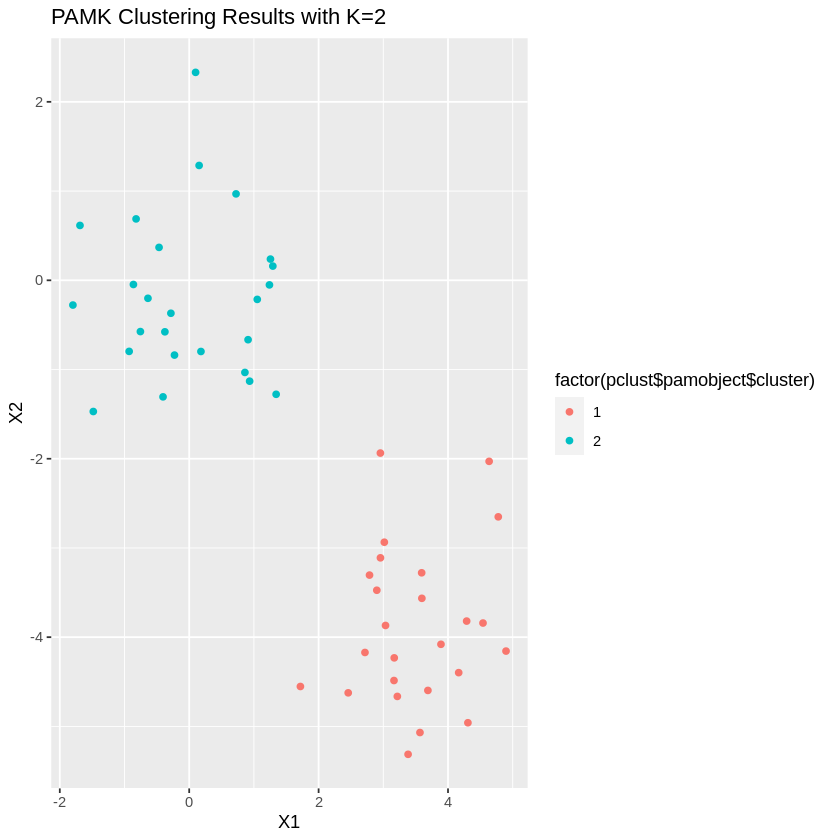

In [12]:
ggplot(df) + geom_point(aes(x=X1, y=X2, color=factor(pclust$pamobject$cluster)))+
ggtitle("PAMK Clustering Results with K=2")
     

# Save your notebook!